In [5]:
import serial
import time
import csv

# Adjust the port and baud rate based on your configuration
port = 'COM3'  # Change this to your serial port
baud_rate = 115200  # Adjust according to your device
threshold = 0  # Adjusting it

# 函数用于处理阈值逻辑
def process_signal(signal, threshold):
    signal = float(signal)  # transfering signals to float
    if -threshold <= signal <= threshold:
        return 0  
    elif signal > threshold:
        return signal - threshold  
    else:
        return signal + threshold  

# Open the serial connection
ser = serial.Serial(port, baudrate=baud_rate, timeout=1)

# Give some time for the connection to establish
time.sleep(2)

print("Listening on serial port...")

# Open a CSV file for writing
with open('emg_data_cleaned.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["EMG Raw", "Signal", "Detect"])  # Write the header

    # Read and process serial data in real time
    try:
        while True:
            if ser.in_waiting > 0:  # Check if there is incoming data
                # Read a line from the serial monitor
                line = ser.readline().decode('utf-8', errors='ignore').strip()  # Handle invalid characters
                if line:  # If the line is not empty
                    try:
                        # Clean and split the CSV data
                        emg_raw, signal, detect = line.split(",")

                        
                        processed_signal = process_signal(signal, threshold)

                        # Write all the data (with threshold processing)
                        print(f"EMG Raw: {emg_raw}, Signal (processed): {processed_signal}, Detect: {detect}")
                        writer.writerow([emg_raw, processed_signal, detect])  # Write the data to CSV
                    except ValueError:
                        print(f"Failed to parse line: {line}")  # Handle lines that don't have the expected format
    except KeyboardInterrupt:
        print("Serial reading stopped.")
    finally:
        ser.close()  # Close the serial connection when done
        print("Serial connection closed.")


Listening on serial port...
EMG Raw: -3bb-337, Signal (processed): 0, Detect: 0
EMG Raw: -335, Signal (processed): 0, Detect: 0
EMG Raw: -336, Signal (processed): 0, Detect: 0
EMG Raw: -345, Signal (processed): 0, Detect: 0
EMG Raw: -353, Signal (processed): 0, Detect: 0
EMG Raw: -338, Signal (processed): 0, Detect: 0
EMG Raw: -307, Signal (processed): 0, Detect: 0
EMG Raw: -303, Signal (processed): 0, Detect: 0
EMG Raw: -346, Signal (processed): 0, Detect: 0
EMG Raw: -390, Signal (processed): 0, Detect: 0
EMG Raw: -376, Signal (processed): 0, Detect: 0
EMG Raw: -314, Signal (processed): 0, Detect: 0
EMG Raw: -277, Signal (processed): 0, Detect: 0
EMG Raw: -307, Signal (processed): 0, Detect: 0
EMG Raw: -364, Signal (processed): 0, Detect: 0
EMG Raw: -383, Signal (processed): 0, Detect: 0
EMG Raw: -355, Signal (processed): 0, Detect: 0
EMG Raw: -320, Signal (processed): 0, Detect: 0
EMG Raw: -312, Signal (processed): 0, Detect: 0
EMG Raw: -326, Signal (processed): 0, Detect: 0
EMG Raw:

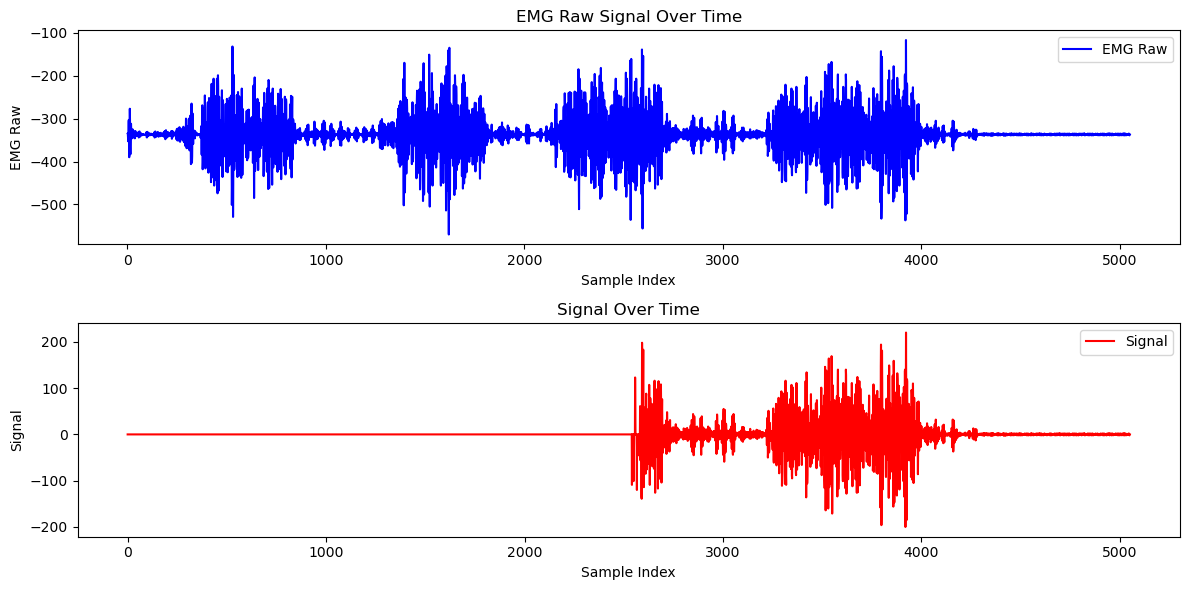

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'emg_data_cleaned.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Convert columns to appropriate data types if needed
data['EMG Raw'] = pd.to_numeric(data['EMG Raw'], errors='coerce')
data['Signal'] = pd.to_numeric(data['Signal'], errors='coerce')

# Create a time or index series
data['Time'] = range(len(data))  # Create an index to act as the x-axis

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot EMG Raw Data
plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['EMG Raw'], label='EMG Raw', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('EMG Raw')
plt.title('EMG Raw Signal Over Time')
plt.legend()

# Plot Signal Data
plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['Signal'], label='Signal', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Signal')
plt.title('Signal Over Time')
plt.legend()

plt.tight_layout()
plt.show()
